<a href="https://colab.research.google.com/github/YoofKhaneja/Heart_Disease_Prediction/blob/master/Codes/Siamese.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing standard libraries

In [0]:
import numpy as np
import pandas as pd
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
warnings.filterwarnings("ignore")

# Seeding values
### This is done so that code values stay uniform

In [0]:
from numpy.random import seed
seed(2)
from tensorflow import set_random_seed
set_random_seed(3)

# Reading the data into a dataframe

In [19]:
url = 'https://raw.githubusercontent.com/YoofKhaneja/Heart_Disease_Prediction/master/Codes/framingham.csv'
hd = pd.read_csv(url)

hd.head(10)

male  age  education  currentSmoker  ...    BMI  heartRate  glucose  TenYearCHD
0     1   39        4.0              0  ...  26.97       80.0     77.0           0
1     0   46        2.0              0  ...  28.73       95.0     76.0           0
2     1   48        1.0              1  ...  25.34       75.0     70.0           0
3     0   61        3.0              1  ...  28.58       65.0    103.0           1
4     0   46        3.0              1  ...  23.10       85.0     85.0           0
5     0   43        2.0              0  ...  30.30       77.0     99.0           0
6     0   63        1.0              0  ...  33.11       60.0     85.0           1
7     0   45        2.0              1  ...  21.68       79.0     78.0           0
8     1   52        1.0              0  ...  26.36       76.0     79.0           0
9     1   43        1.0              1  ...  23.61       93.0     88.0           0

[10 rows x 16 columns]

# Data exploration

In [20]:
print('Total patients: ', hd.shape[0])
print('Total attributes: ', hd.shape[1] - 1)
print('Number of labels: ', 1, '(', hd.columns[15], ')')

Total patients:  4240
Total attributes:  15
Number of labels:  1 ( TenYearCHD )


In [21]:
hd.describe()

male          age  ...      glucose   TenYearCHD
count  4240.000000  4240.000000  ...  3852.000000  4240.000000
mean      0.429245    49.580189  ...    81.963655     0.151887
std       0.495027     8.572942  ...    23.954335     0.358953
min       0.000000    32.000000  ...    40.000000     0.000000
25%       0.000000    42.000000  ...    71.000000     0.000000
50%       0.000000    49.000000  ...    78.000000     0.000000
75%       1.000000    56.000000  ...    87.000000     0.000000
max       1.000000    70.000000  ...   394.000000     1.000000

[8 rows x 16 columns]

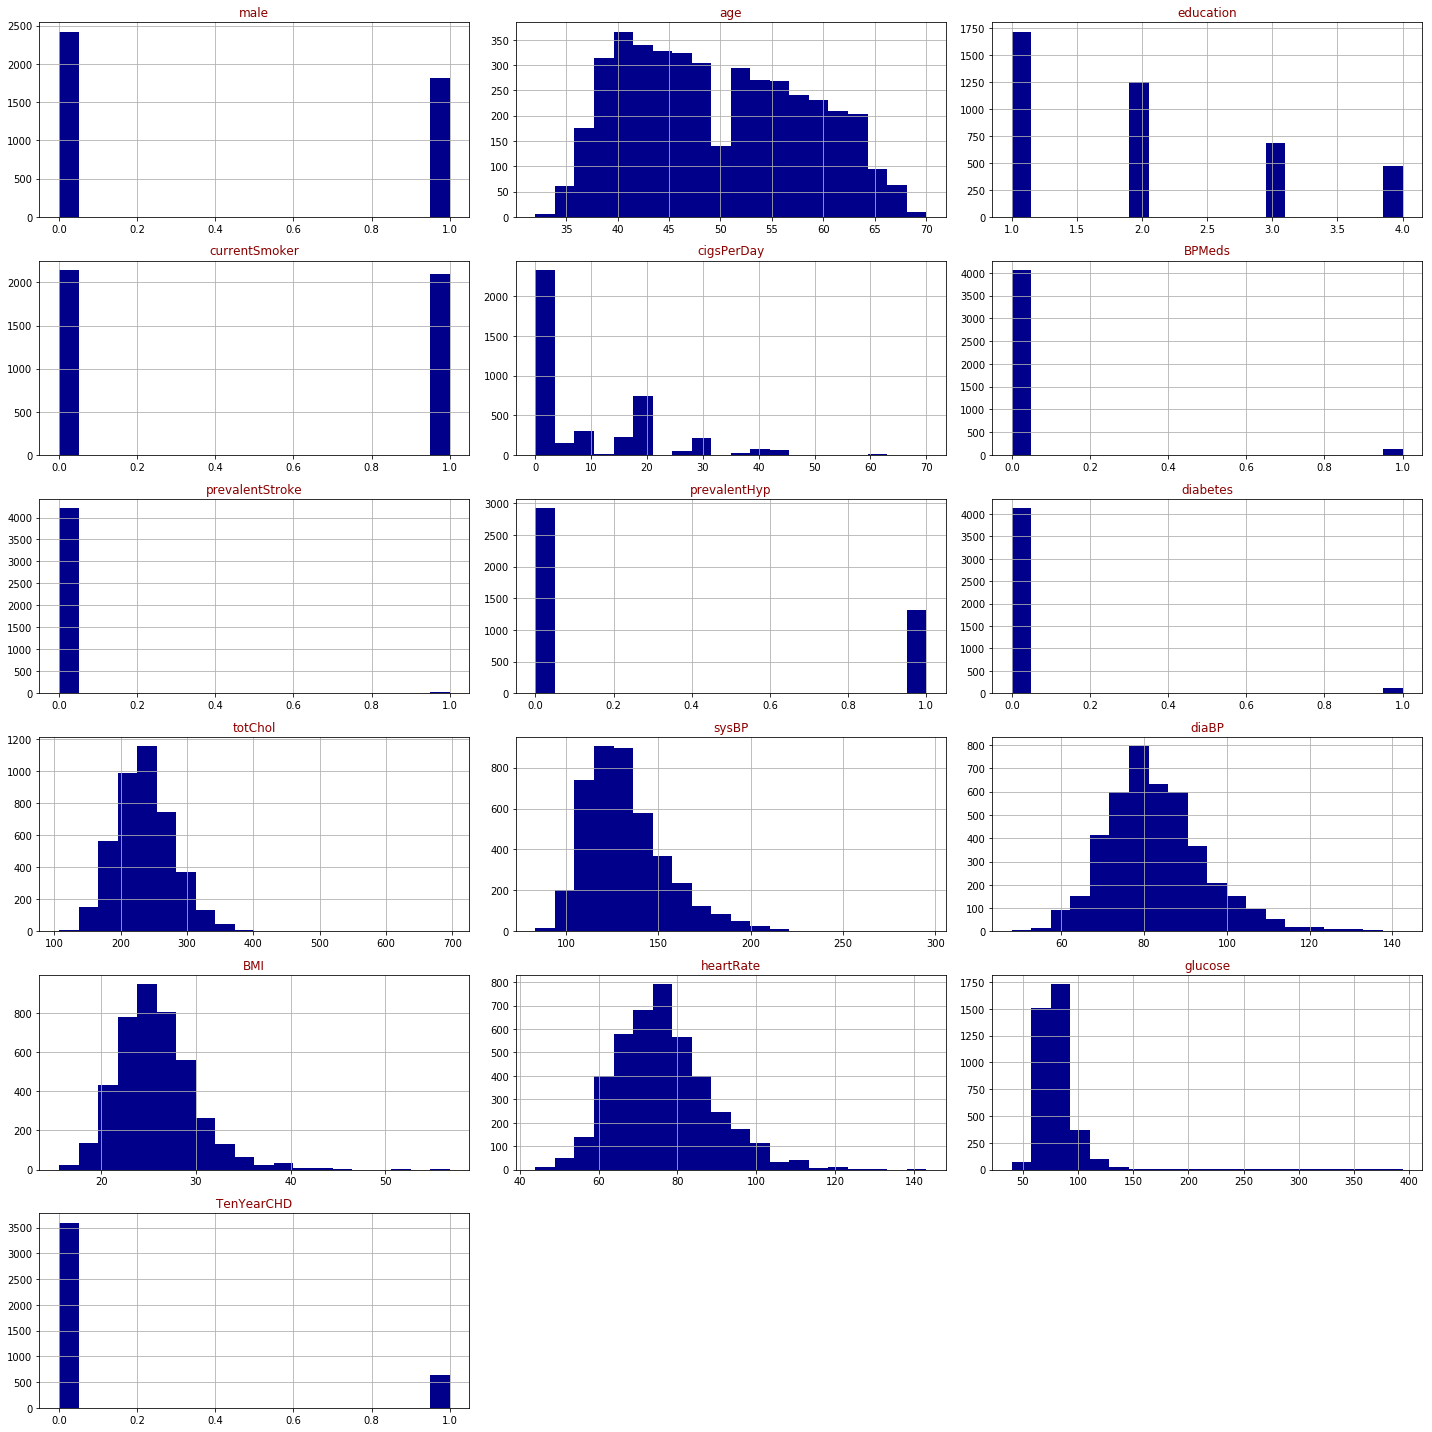

In [22]:
def draw_histograms(dataframe, features, rows, cols):
    fig = plt.figure(figsize = (20, 20))
    for i, feature in enumerate(features):
        ax = fig.add_subplot(rows, cols, i+1)
        dataframe[feature].hist(bins = 20, ax = ax, facecolor = 'DarkBlue')
        ax.set_title(feature, color = 'DarkRed')
    fig.tight_layout()  
    plt.show()
draw_histograms(hd, hd.columns, 6, 3)

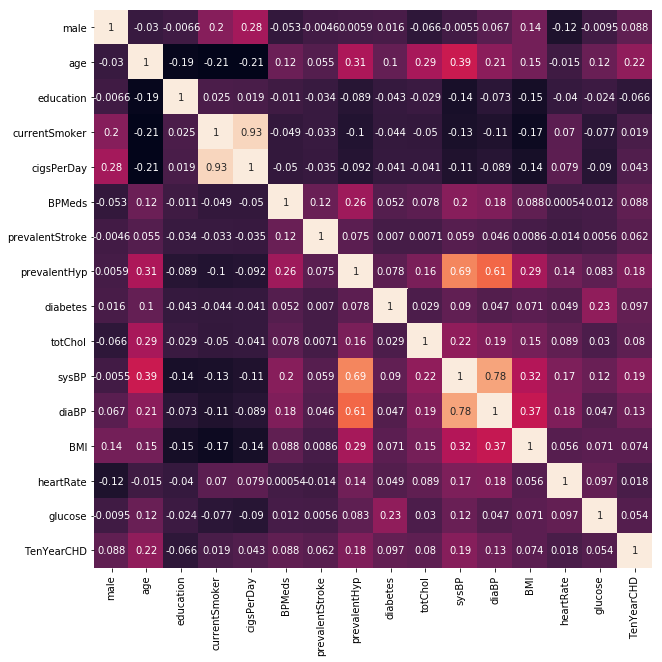

In [23]:
corr = hd.corr(method = 'spearman')

plt.figure(figsize = (10, 16))
sns.heatmap(corr, square = True, cbar = False, annot = True)

Total patients at risk of CHD:  644
Total patients not at risk of CHD:  3596


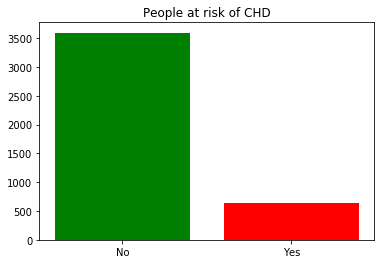

In [24]:
from collections import Counter
chdc = Counter(hd['TenYearCHD'])
print('Total patients at risk of CHD: ', chdc[1])
print('Total patients not at risk of CHD: ', chdc[0])
plt.bar(list(chdc.keys()), chdc.values(), color = ['g', 'r'])
plt.xticks(list(chdc.keys()), ['No', 'Yes'])
plt.title('People at risk of CHD')
plt.show()

In [25]:
print('Missing values: ')
print(hd.isnull().sum())

mv = np.array(hd.isnull().sum())
ta = 0
for t in mv:
    ta += t
print('\nTotal missing attributes: ', ta)

tr = 0
for i in hd.isnull().sum(axis = 1):
    if i > 0:
        tr += 1
print('\nTotal rows with missing data: ', tr)

Missing values: 
male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

Total missing attributes:  645

Total rows with missing data:  582


# Dropping irrelevant columns

In [26]:
hd.drop(['education'], axis = 1, inplace = True)
hd.isnull().sum()

male                 0
age                  0
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

# Imputing missing values using different techniques

In [0]:
from fancyimpute import KNN, SoftImpute, IterativeImputer, SimpleFill, IterativeSVD, MatrixFactorization

hd.BPMeds = hd.BPMeds.fillna(0)
hdi = pd.DataFrame(IterativeImputer().fit_transform(hd))

hdi.columns = hd.columns

In [28]:
hdi.isnull().sum()

male               0
age                0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

In [29]:
hdi.head(20)

male   age  currentSmoker  ...  heartRate     glucose  TenYearCHD
0    1.0  39.0            0.0  ...       80.0   77.000000         0.0
1    0.0  46.0            0.0  ...       95.0   76.000000         0.0
2    1.0  48.0            1.0  ...       75.0   70.000000         0.0
3    0.0  61.0            1.0  ...       65.0  103.000000         1.0
4    0.0  46.0            1.0  ...       85.0   85.000000         0.0
5    0.0  43.0            0.0  ...       77.0   99.000000         0.0
6    0.0  63.0            0.0  ...       60.0   85.000000         1.0
7    0.0  45.0            1.0  ...       79.0   78.000000         0.0
8    1.0  52.0            0.0  ...       76.0   79.000000         0.0
9    1.0  43.0            1.0  ...       93.0   88.000000         0.0
10   0.0  50.0            0.0  ...       75.0   76.000000         0.0
11   0.0  43.0            0.0  ...       72.0   61.000000         0.0
12   1.0  46.0            1.0  ...       98.0   64.000000         0.0
13   0.0  41.0            0.0  ...       65.0   84.000000         0.0
14   0.0  39.0            1.0  ...       85.0   80.024468         0.0
15   0.0  38.0            1.0  ...       95.0   70.000000         1.0
16   1.0  48.0            1.0  ...       64.0   72.000000         0.0
17   0.0  46.0            1.0  ...       80.0   89.000000         1.0
18   0.0  38.0            1.0  ...       75.0   78.000000         0.0
19   1.0  41.0            0.0  ...       85.0   65.000000         0.0

[20 rows x 15 columns]

In [30]:
hdi.describe()

male          age  ...      glucose   TenYearCHD
count  4240.000000  4240.000000  ...  4240.000000  4240.000000
mean      0.429245    49.580189  ...    81.816071     0.151887
std       0.495027     8.572942  ...    23.012198     0.358953
min       0.000000    32.000000  ...    40.000000     0.000000
25%       0.000000    42.000000  ...    72.000000     0.000000
50%       0.000000    49.000000  ...    78.000000     0.000000
75%       1.000000    56.000000  ...    85.582669     0.000000
max       1.000000    70.000000  ...   394.000000     1.000000

[8 rows x 15 columns]

# Formatting the data

In [31]:
hd_ = hdi.copy(deep = True)
hd_['age'] = pd.cut(hd_['age'], 
 
                    5, 
                    labels = [1, 2, 3, 4, 5])
hd_['cigsPerDay'] = pd.cut(hd_['cigsPerDay'], 
                           6, 
                           labels = [1, 2, 3, 4, 5, 6])
hd_['totChol'] = pd.cut(hd_['totChol'], 
                        13, 
                        labels = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13])
hd_['sysBP'] = pd.cut(hd_['sysBP'], 
                      10, 
                      labels = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
hd_['diaBP'] = pd.cut(hd_['diaBP'], 
                      8, 
                      labels = [1, 2, 3, 4, 5, 6, 7, 8])
hd_['BMI'] = pd.cut(hd_['BMI'], 
                    10, 
                    labels = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
hd_['heartRate'] = pd.cut(hd_['heartRate'], 
                          8, 
                          labels = [1, 2, 3, 4, 5, 6, 7, 8])
hd_['glucose'] = pd.cut(hd_['glucose'], 
                        15, 
                        labels = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15])

hd_['age'] = hd_['age'].apply(lambda x: round(x*0.2, 2))
hd_['cigsPerDay'] = hd_['cigsPerDay'].apply(lambda x: round(x*0.16, 2))
hd_['totChol'] = hd_['totChol'].apply(lambda x: round(x*0.077, 2))
hd_['sysBP'] = hd_['sysBP'].apply(lambda x: round(x*0.1, 2))
hd_['diaBP'] = hd_['diaBP'].apply(lambda x: round(x*0.125, 2))
hd_['BMI'] = hd_['BMI'].apply(lambda x: round(x*0.1, 2))
hd_['heartRate'] = hd_['heartRate'].apply(lambda x: round(x*0.125, 2))
hd_['glucose'] = hd_['glucose'].apply(lambda x: round(x*0.067, 2))

hd_.head(10)

male  age  currentSmoker cigsPerDay  ...  BMI  heartRate  glucose  TenYearCHD
0   1.0  0.2            0.0       0.16  ...  0.3       0.38     0.13         0.0
1   0.0  0.4            0.0       0.16  ...  0.4       0.62     0.13         0.0
2   1.0  0.6            1.0       0.32  ...  0.3       0.38     0.13         0.0
3   0.0  0.8            1.0       0.48  ...  0.4       0.25     0.20         1.0
4   0.0  0.4            1.0       0.32  ...  0.2       0.50     0.13         0.0
5   0.0  0.4            0.0       0.16  ...  0.4       0.38     0.20         0.0
6   0.0  1.0            0.0       0.16  ...  0.5       0.25     0.13         1.0
7   0.0  0.4            1.0       0.32  ...  0.2       0.38     0.13         0.0
8   1.0  0.6            0.0       0.16  ...  0.3       0.38     0.13         0.0
9   1.0  0.4            1.0       0.48  ...  0.2       0.50     0.20         0.0

[10 rows x 15 columns]

# Generating pairs for the Siamese network

In [32]:
import random

hd1 = hd_[hd_['TenYearCHD'] == 1.0].astype('float32')
hd0 = hd_[hd_['TenYearCHD'] == 0.0].astype('float32')

hd1x = hd1.iloc[:, :-1]
hd1y = hd1.iloc[:, -1]
hd0x = hd0.iloc[:, :-1]
hd0y = hd0.iloc[:, -1]

hd1x = hd1x.to_numpy()
hd1y = hd1y.to_numpy()
hd0x = hd0x.to_numpy()
hd0y = hd0y.to_numpy()

p0 = []
p1 = []
label = []

for i in range(1000):
    for j in range(1000):
        t = random.randint(0, 600)
        p0 += [[hd0x[i], hd1x[t]]]
for i in range(1000):
    for j in range(500):
        p1 += [[hd0x[i], hd0x[j]]]
for i in range(500):
    for j in range(1000):
        t = random.randint(0, 600)
        p1 += [[hd0x[i], hd0x[t]]]
        
p = []
for i in range(100000):
    p.append(p0[i])
    label.append(0)
    p.append(p1[i])
    label.append(1)
X = np.array(p)
Y = np.array(label)
print(X[:10])
print(Y[:10])

[[[1.   0.2  0.   0.16 0.   0.   0.   0.   0.15 0.2  0.25 0.3  0.38 0.13]
  [1.   0.8  0.   0.16 0.   0.   1.   0.   0.31 0.4  0.62 0.3  0.12 0.13]]

 [[1.   0.2  0.   0.16 0.   0.   0.   0.   0.15 0.2  0.25 0.3  0.38 0.13]
  [1.   0.2  0.   0.16 0.   0.   0.   0.   0.15 0.2  0.25 0.3  0.38 0.13]]

 [[1.   0.2  0.   0.16 0.   0.   0.   0.   0.15 0.2  0.25 0.3  0.38 0.13]
  [0.   0.6  0.   0.16 1.   0.   1.   1.   0.39 0.6  0.5  0.2  0.38 0.54]]

 [[1.   0.2  0.   0.16 0.   0.   0.   0.   0.15 0.2  0.25 0.3  0.38 0.13]
  [0.   0.4  0.   0.16 0.   0.   0.   0.   0.31 0.2  0.38 0.4  0.62 0.13]]

 [[1.   0.2  0.   0.16 0.   0.   0.   0.   0.15 0.2  0.25 0.3  0.38 0.13]
  [1.   0.8  0.   0.16 1.   0.   1.   0.   0.39 0.6  0.75 0.3  0.25 0.2 ]]

 [[1.   0.2  0.   0.16 0.   0.   0.   0.   0.15 0.2  0.25 0.3  0.38 0.13]
  [1.   0.6  1.   0.32 0.   0.   0.   0.   0.31 0.3  0.38 0.3  0.38 0.13]]

 [[1.   0.2  0.   0.16 0.   0.   0.   0.   0.15 0.2  0.25 0.3  0.38 0.13]
  [0.   0.8  0.   0.16 0. 

In [33]:
p = np.random.permutation(200000)

X = X[p]
Y = Y[p]

x_train = X[:160000]
x_test = X[160000:]
y_train = Y[:160000]
y_test = Y[160000:]

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

print(y_train[10:20])

(160000, 2, 14)
(40000, 2, 14)
(160000,)
(40000,)
[0 0 1 0 0 1 1 0 0 0]


# Creating and compiling the neural network model
### The model contains two hidden layers, each with 200 neurons. Dropout and regularization are applied to ensure that there is no overfitting

In [0]:
from keras.models import Model
from keras.layers import Input, Flatten, Dense, Dropout, Lambda
from keras.optimizers import RMSprop
from keras import regularizers
from keras import backend as K

def create_base_network(input_shape):
    input = Input(shape =  input_shape)
    x = input
    x = Dense(256, 
              input_shape = (14,), 
              activation='relu')(x)
              #activity_regularizer = regularizers.l2(0.01))(x)
    x = Dropout(0.2)(x)
    x = Dense(256, 
              activation='relu')(x)
              #activity_regularizer = regularizers.l2(0.01))(x)
    x = Dropout(0.2)(x)
    x = Dense(256, 
              activation='relu')(x)
              #activity_regularizer = regularizers.l2(0.01))(x)
    return Model(input, x)

def euclidean_distance(vects):
    x, y = vects
    sum_square = K.sum(K.square(x - y), axis = 1, keepdims=True)
    return K.sqrt(K.maximum(sum_square, K.epsilon()))


def eucl_dist_output_shape(shapes):
    shape1, shape2 = shapes
    print(shape1)
    return (shape1[0], 1)


def contrastive_loss(y_true, y_pred):
    margin = 1
    square_pred = K.square(y_pred)
    margin_square = K.square(K.maximum(margin - y_pred, 0))
    return K.mean(y_true * square_pred + (1 - y_true) * margin_square)

def accuracy(y_true, y_pred):
    return K.mean(K.equal(y_true, K.cast(y_pred < 0.5, y_true.dtype)))

In [35]:
input_shape = (14,)
base_network = create_base_network(input_shape)

input_a = Input(shape = input_shape)
input_b = Input(shape = input_shape)

processed_a = base_network(input_a)
processed_b = base_network(input_b)

distance = Lambda(euclidean_distance, 
                  output_shape = eucl_dist_output_shape)([processed_a, processed_b])

model = Model([input_a, input_b], distance)

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
(None, 256)


In [36]:
rms = RMSprop()

model.compile(loss = contrastive_loss, 
              optimizer = rms, 
              metrics=[accuracy])

model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            (None, 14)           0                                            
__________________________________________________________________________________________________
input_3 (InputLayer)            (None, 14)           0                                            
__________________________________________________________________________________________________
model_1 (Model)                 (None, 256)          135424      input_2[0][0]                    
                                                                 input_3[0][0]                    
__________________________________________________________________________________________________
lambda_1 (Lambda)               (None, 1)            0           model_1[1][0]                    
          

# Defining functions to better understand the training process
### One function prints the average accuracy and loss, the other plots the values for loss and accuracy accross a training session


In [0]:
def stats_avg(history, i):
    val_acc = np.array(history.history['val_accuracy'])
    val_loss = np.array(history.history['val_loss'])
    model_acc = np.array(history.history['accuracy'])
    model_loss = np.array(history.history['loss'])
    print('Average validation loss:', val_loss.sum()/i)
    print('Average validation accuracy:', val_acc.sum()/i)
    print('Average loss:', model_loss.sum()/i)
    print('Average accuracy:', model_acc.sum()/i)

In [0]:
def plots(history):
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc='upper left')
    plt.show()
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc='upper left')
    plt.show()

# Training the network

Instructions for updating:
Use tf.cast instead.
Train on 120000 samples, validate on 40000 samples
Epoch 1/10
120000/120000 [==============================] - 10s 83us/step - loss: 0.1997 - accuracy: 0.6856 - val_loss: 0.1574 - val_accuracy: 0.7728
Epoch 2/10
120000/120000 [==============================] - 7s 59us/step - loss: 0.1387 - accuracy: 0.8027 - val_loss: 0.0911 - val_accuracy: 0.8769
Epoch 3/10
120000/120000 [==============================] - 7s 58us/step - loss: 0.0859 - accuracy: 0.8877 - val_loss: 0.0395 - val_accuracy: 0.9519
Epoch 4/10
120000/120000 [==============================] - 7s 59us/step - loss: 0.0496 - accuracy: 0.9386 - val_loss: 0.0234 - val_accuracy: 0.9704
Epoch 5/10
120000/120000 [==============================] - 8s 67us/step - loss: 0.0325 - accuracy: 0.9618 - val_loss: 0.0107 - val_accuracy: 0.9879
Epoch 6/10
120000/120000 [==============================] - 8s 64us/step - loss: 0.0253 - accuracy: 0.9708 - val_loss: 0.0099 - val_accuracy: 0.9878
Epoch 

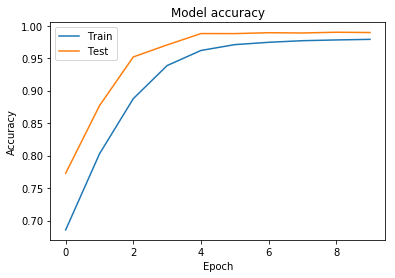

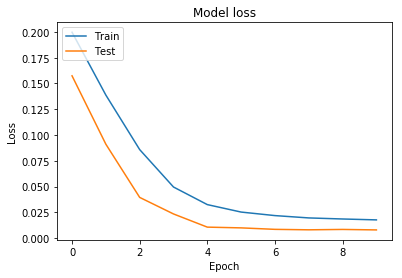

In [39]:
for i in range(1):
    history = model.fit([x_train[:, 0], x_train[:, 1]], y_train,
          batch_size = 64,
          epochs = 10,
          validation_split = 0.25,
          verbose = 1)
    stats_avg(history, 50)
    plots(history)

# Testing and evaluating the model

In [0]:
y_pred = model.predict([x_test[:, 0], x_test[:, 1]])
y_pred = (y_pred <= 0.5)

In [41]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
conf_matrix = pd.DataFrame(data = cm, 
                           columns = ['Predicted: 0', 'Predicted: 1'], 
                           index = ['Actual:0', 'Actual:1'])

print('Accuracy:', accuracy_score(y_test, y_pred))
conf_matrix

Accuracy: 0.990025


Predicted: 0  Predicted: 1
Actual:0         19736           310
Actual:1            89         19865

In [42]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred, labels = [0, 1]))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99     20046
           1       0.98      1.00      0.99     19954

    accuracy                           0.99     40000
   macro avg       0.99      0.99      0.99     40000
weighted avg       0.99      0.99      0.99     40000

